# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Carlos Henrique Brito Malta Leão/Vinícius Alves de Faria Resende
### **Matrículas:** 2021039794/2021039972


### **Tema:** Avaliação Preditiva do Desempenho Acadêmico: Técnicas de Regressão para Identificação de Fatores de Evasão e Permanência Estudantil
### **Base de dados:** https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/


In [208]:
#Bibliotecas usadas no projeto
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## 2. Data understanding (Entendimento dos dados)

### Resumo da Fase
A primeira fase do projeto é a "Data Understanding," que se concentra na coleta e compreensão inicial dos dados. Esta fase é essencial para estabelecer uma base sólida para análises posteriores e identificar possíveis desafios.


### Introdução

Este conjunto de dados contém informações sobre estudantes, incluindo detalhes demográficos, histórico educacional, desempenho acadêmico e variáveis econômicas. O objetivo é analisar esses dados para entender padrões e correlações que possam influenciar o sucesso acadêmico dos alunos.

#### Informações Gerais
O conjunto de dados possui 4424 entradas e 35 colunas. Cada entrada representa um estudante, e as colunas abrangem uma variedade de características, desde o estado civil e modo de inscrição até o desempenho em diferentes semestres e variáveis econômicas.

A coluna alvo é denominada "Target" e indica se o aluno desistiu ("Dropout"), seguiu com a graduação ("Enrolled") ou se formou ("Graduate"). As demais colunas contêm informações como estado civil, modo de inscrição, idade na matrícula, qualificação dos pais, ocupação dos pais, desempenho acadêmico e indicadores econômicos.

Não há valores ausentes em nenhuma das colunas do conjunto de dados.


In [168]:
#Carregando a base de dados
df = pd.read_csv('./dataset.csv')

In [169]:
# Visualizar as primeiras linhas do conjunto de dados
print("Primeiras linhas do conjunto de dados:")
print(df.head())

Primeiras linhas do conjunto de dados:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10               

In [170]:
# Informações gerais sobre o conjunto de dados
print("\nInformações gerais sobre o conjunto de dados:")
print(df.info())


Informações gerais sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  

In [171]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
m

In [172]:
# Verificar valores ausentes
print("\nValores ausentes no conjunto de dados:")
print(df.isnull().sum())


Valores ausentes no conjunto de dados:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International           

In [173]:
# Mapear os códigos para os significados correspondentes
marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

gender_mapping = {
    1: 'Male',
    0: 'Female'
}

qualification_mapping = {
    1: 'Secondary Education—12th Year of Schooling or Equivalent',
    2: 'Higher Education—bachelor’s degree',
    3: 'Higher Education—degree',
    4: 'Higher Education—master’s degree',
    5: 'Higher Education—doctorate',
    6: 'Frequency of Higher Education',
    7: '12th Year of Schooling—not completed',
    8: '11th Year of Schooling—not completed',
    9: '7th Year (Old)',
    10: 'Other—11th Year of Schooling',
    11: '2nd year complementary high school course',
    12: '10th Year of Schooling',
    13: 'General commerce course',
    14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    15: 'Complementary High School Course',
    16: 'Technical-professional course',
    17: 'Complementary High School Course—not concluded',
    18: '7th year of schooling',
    19: '2nd cycle of the general high school course',
    20: '9th Year of Schooling—not completed',
    21: '8th year of schooling',
    22: 'General Course of Administration and Commerce',
    23: 'Supplementary Accounting and Administration',
    24: 'Unknown',
    25: 'Cannot read or write',
    26: 'Can read without having a 4th year of schooling',
    27: 'Basic education 1st cycle (4th/5th year) or equivalent',
    28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    29: 'Technological specialization course',
    30: 'Higher education—degree (1st cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—master’s degree (2nd cycle)',
    34: 'Higher Education—doctorate (3rd cycle)'
}


occupation_mapping = {
    1: 'Student',
    2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    3: 'Specialists in Intellectual and Scientific Activities',
    4: 'Intermediate Level Technicians and Professions',
    5: 'Administrative staff',
    6: 'Personal Services, Security and Safety Workers, and Sellers',
    7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    8: 'Skilled Workers in Industry, Construction, and Craftsmen',
    9: 'Installation and Machine Operators and Assembly Workers',
    10: 'Unskilled Workers',
    11: 'Armed Forces Professions',
    12: 'Other Situation; 13—(blank)',
    14: 'Armed Forces Officers',
    15: 'Armed Forces Sergeants',
    16: 'Other Armed Forces personnel',
    17: 'Directors of administrative and commercial services',
    18: 'Hotel, catering, trade, and other services directors',
    19: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    20: 'Health professionals',
    21: 'Teachers',
    22: 'Specialists in finance, accounting, administrative organization, and public and commercial relations',
    23: 'Intermediate level science and engineering technicians and professions',
    24: 'Technicians and professionals of intermediate level of health',
    25: 'Intermediate level technicians from legal, social, sports, cultural, and similar services',
    26: 'Information and communication technology technicians',
    27: 'Office workers, secretaries in general, and data processing operators',
    28: 'Data, accounting, statistical, financial services, and registry-related operators',
    29: 'Other administrative support staff',
    30: 'Personal service workers',
    31: 'Sellers',
    32: 'Personal care workers and the like',
    33: 'Protection and security services personnel',
    34: 'Market-oriented farmers and skilled agricultural and animal production workers',
    35: 'Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence',
    36: 'Skilled construction workers and the like, except electricians',
    37: 'Skilled workers in metallurgy, metalworking, and similar',
    38: 'Skilled workers in electricity and electronics',
    39: 'Workers in food processing, woodworking, and clothing and other industries and crafts',
    40: 'Fixed plant and machine operators',
    41: 'Assembly workers',
    42: 'Vehicle drivers and mobile equipment operators',
    43: 'Unskilled workers in agriculture, animal production, and fisheries and forestry',
    44: 'Unskilled workers in extractive industry, construction, manufacturing, and transport',
    45: 'Meal preparation assistants',
    46: 'Street vendors (except food) and street service providers'
}


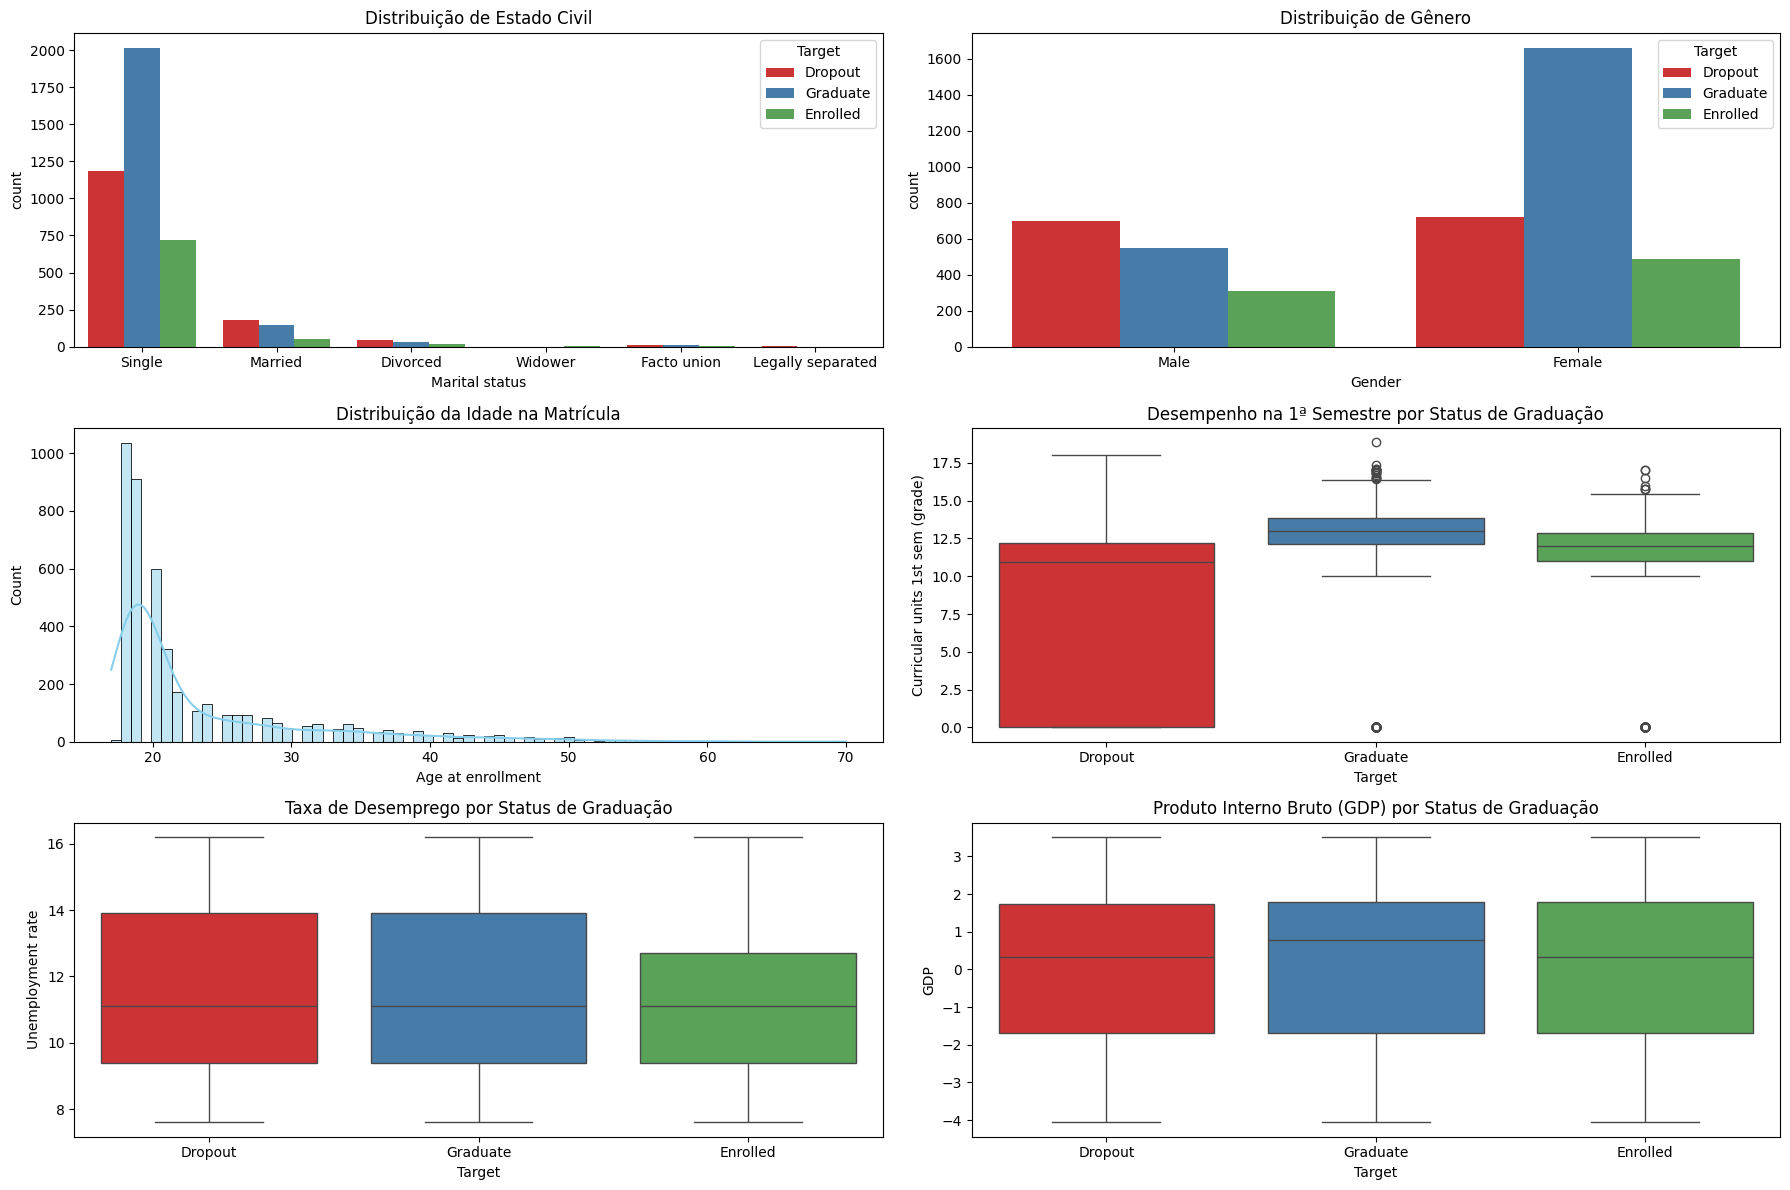

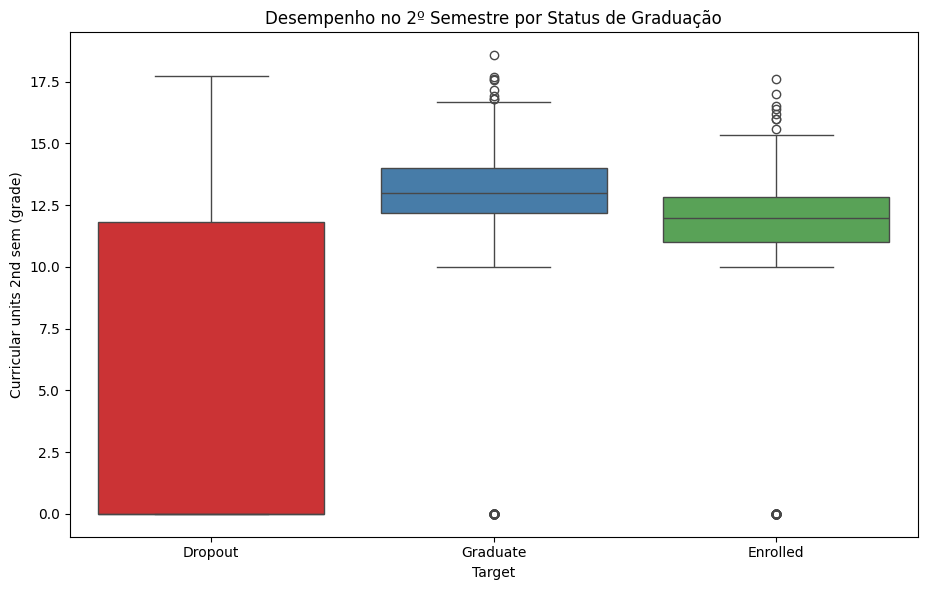

In [174]:
# Visualizar a distribuição de variáveis categóricas
plt.figure(figsize=(18, 12))

# Gráfico de Estado Civil
plt.subplot(3, 2, 1)
sns.countplot(x='Marital status', data=df.replace({'Marital status': marital_status_mapping}), hue='Target', palette='Set1')
plt.title('Distribuição de Estado Civil')

# Gráfico de Gênero
plt.subplot(3, 2, 2)
sns.countplot(x='Gender', data=df.replace({'Gender': gender_mapping}), hue='Target', palette='Set1')
plt.title('Distribuição de Gênero')

# Gráfico de Idade na Matrícula
plt.subplot(3, 2, 3)
sns.histplot(df['Age at enrollment'], kde=True, color='skyblue')
plt.title('Distribuição da Idade na Matrícula')

# Gráfico de Desempenho na 1ª Semestre por Status de Graduação
plt.subplot(3, 2, 4)
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df, palette='Set1', hue='Target')
plt.title('Desempenho na 1ª Semestre por Status de Graduação')

# Gráfico de Taxa de Desemprego por Status de Graduação
plt.subplot(3, 2, 5)
sns.boxplot(x='Target', y='Unemployment rate', data=df, palette='Set1', hue='Target')
plt.title('Taxa de Desemprego por Status de Graduação')

# Gráfico de Produto Interno Bruto (GDP) por Status de Graduação
plt.subplot(3, 2, 6)
sns.boxplot(x='Target', y='GDP', data=df, palette='Set1', hue='Target')
plt.title('Produto Interno Bruto (GDP) por Status de Graduação')

plt.tight_layout()
plt.show()

# Gráfico de Desempenho no 2º Semestre por Status de Graduação
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df, palette='Set1', hue='Target')
plt.title('Desempenho no 2º Semestre por Status de Graduação')

plt.tight_layout()
plt.show()


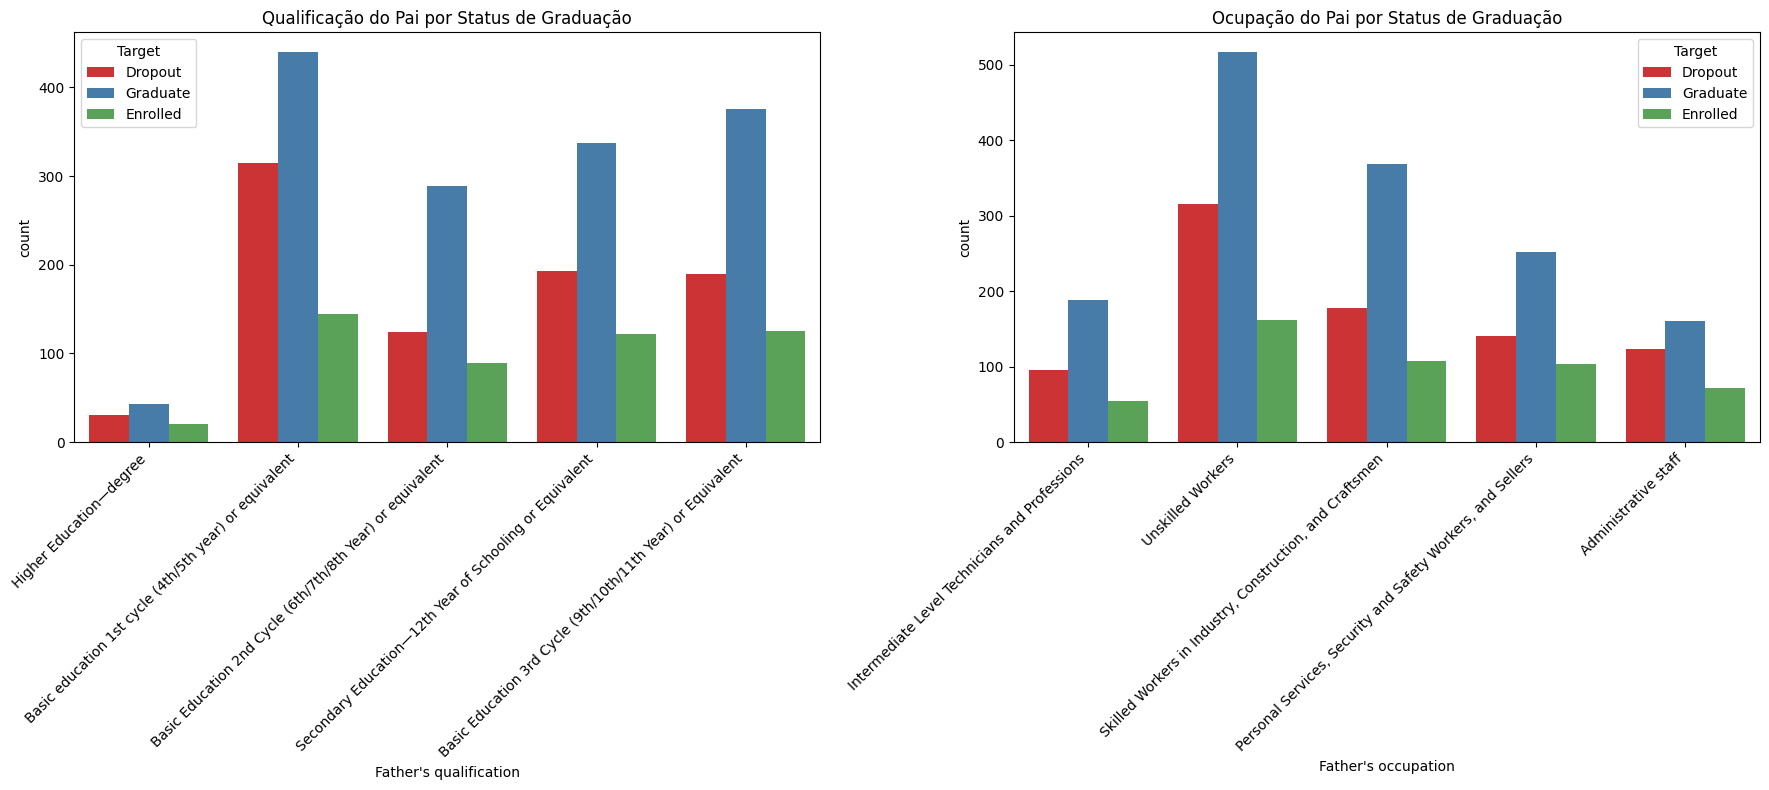

In [175]:
# Escolher apenas as 5 classificações mais frequentes para as variáveis de ocupação e qualificação
top_father_occupations = df["Father's occupation"].value_counts().nlargest(5).index
top_father_qualifications = df["Father's qualification"].value_counts().nlargest(5).index

# Filtrar o DataFrame apenas para incluir as classificações mais frequentes
df_father_filtered = df[df["Father's occupation"].isin(top_father_occupations) & df["Father's qualification"].isin(top_father_qualifications)].copy()

# Mapear os códigos para rótulos nas variáveis categóricas
df_father_filtered.loc[:, "Father's occupation"] = df_father_filtered["Father's occupation"].map(occupation_mapping)
df_father_filtered.loc[:, "Father's qualification"] = df_father_filtered["Father's qualification"].map(qualification_mapping)

# Configurar a aparência dos gráficos
plt.figure(figsize=(18, 8))

hue_order = ['Dropout', 'Graduate', 'Enrolled']

# Gráfico de Qualificação do Pai por Target
plt.subplot(1, 2, 1)
sns.countplot(x="Father's qualification", data=df_father_filtered, hue='Target', hue_order=hue_order, palette='Set1')
plt.title("Qualificação do Pai por Status de Graduação")
plt.xticks(rotation=45, ha='right')

# Gráfico de Ocupação do Pai por Target
plt.subplot(1, 2, 2)
sns.countplot(x="Father's occupation", data=df_father_filtered, hue='Target', hue_order=hue_order, palette='Set1')
plt.title("Ocupação do Pai por Status de Graduação")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

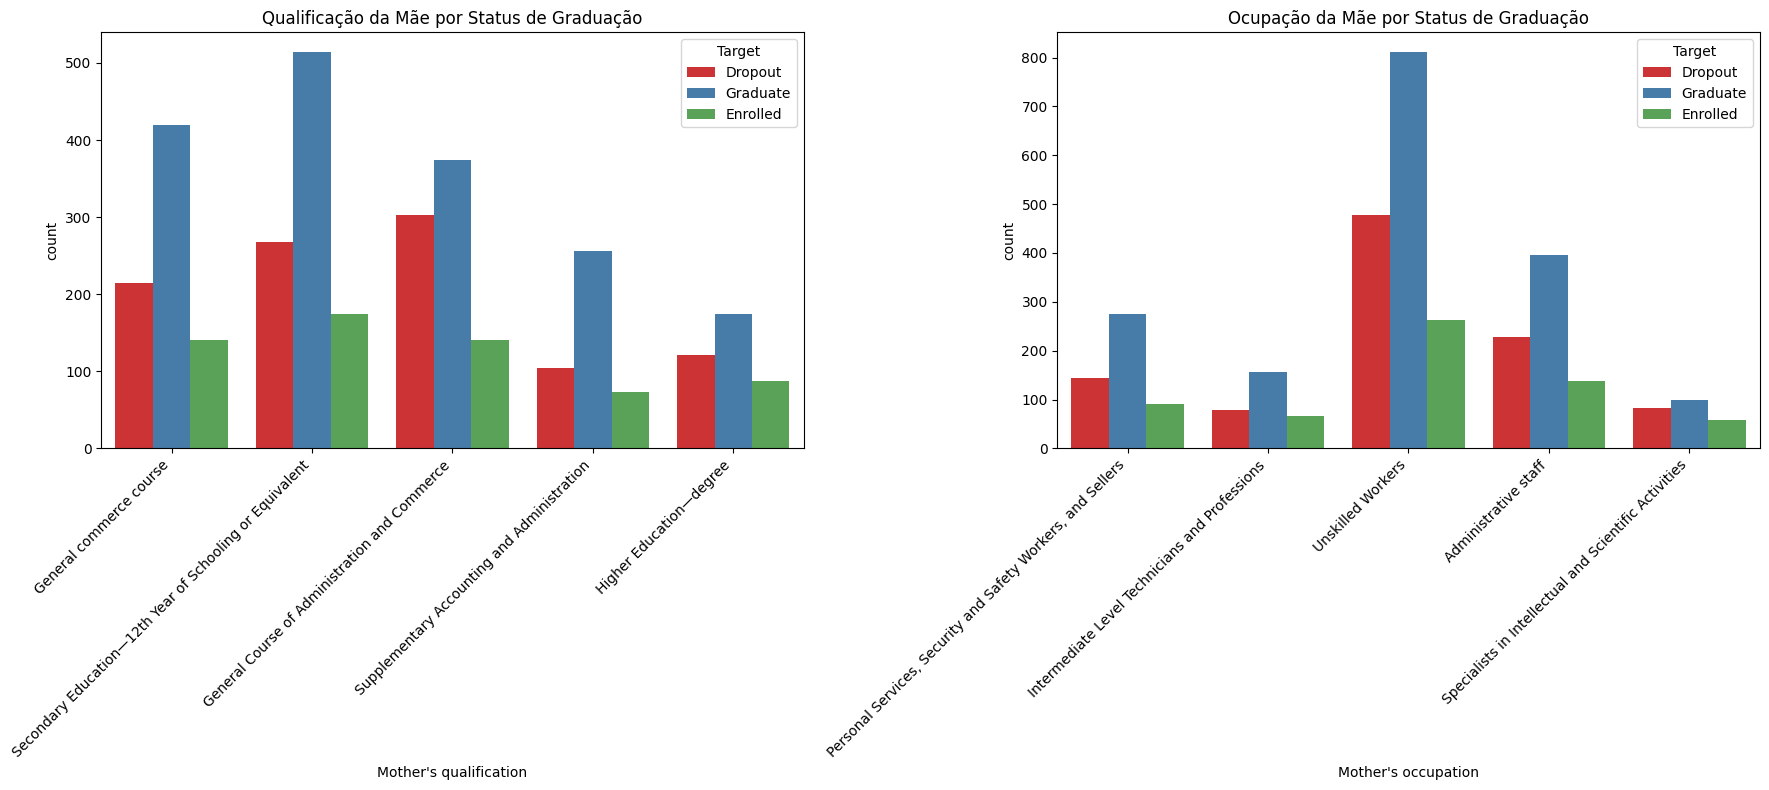

In [176]:
# Escolher apenas as 5 classificações mais frequentes para as variáveis de ocupação e qualificação
top_mother_occupations = df["Mother's occupation"].value_counts().nlargest(5).index
top_mother_qualifications = df["Mother's qualification"].value_counts().nlargest(5).index

# Filtrar o DataFrame apenas para incluir as classificações mais frequentes
df_mother_filtered = df[df["Mother's occupation"].isin(top_mother_occupations) & df["Mother's qualification"].isin(top_mother_qualifications)].copy()

# Mapear os códigos para rótulos nas variáveis categóricas
df_mother_filtered.loc[:, "Mother's occupation"] = df_mother_filtered["Mother's occupation"].map(occupation_mapping)
df_mother_filtered.loc[:, "Mother's qualification"] = df_mother_filtered["Mother's qualification"].map(qualification_mapping)

# Configurar a aparência dos gráficos
plt.figure(figsize=(18, 8))

# Gráfico de Qualificação da Mãe por Target
plt.subplot(1, 2, 1)
sns.countplot(x="Mother's qualification", data=df_mother_filtered, hue='Target', hue_order=hue_order, palette='Set1')
plt.title("Qualificação da Mãe por Status de Graduação")
plt.xticks(rotation=45, ha='right')

# Gráfico de Ocupação da Mãe por Target
plt.subplot(1, 2, 2)
sns.countplot(x="Mother's occupation", data=df_mother_filtered, hue='Target', palette='Set1')
plt.title("Ocupação da Mãe por Status de Graduação")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [177]:
# Função para imprimir estatísticas descritivas e contagens para variáveis categóricas
def print_categorical_stats(feature, df):
    print(f"\nEstatísticas para {feature}:")
    if feature in df.columns:
        if feature == 'Ocupation' or feature == "Mother's occupation" or feature == "Father's occupation":
            mapping = occupation_mapping
        elif feature == "Mother's qualification" or feature == "Father's qualification":
            mapping = qualification_mapping
        elif feature == 'Gender':
            mapping = gender_mapping
        elif feature == 'Marital status':
            mapping = marital_status_mapping
        else:
            mapping = None

        if mapping:
            # Substituir códigos pelos rótulos correspondentes
            df_display = df.replace({feature: mapping})

            # Contagem de categorias
            print(df_display[feature].value_counts())

            # Estatísticas descritivas
            print("\nEstatísticas Descritivas:")
            print(df_display.groupby('Target')[feature].describe())
        else:
            print(f"Mapeador não encontrado para a variável {feature}.")
    else:
        print(f"A coluna {feature} não está presente no DataFrame.")

In [178]:
# Lista de variáveis categóricas
categorical_variables = ['Marital status', 'Gender', 'Qualification', 'Ocupation',
                          "Mother's qualification", "Father's qualification",
                          "Mother's occupation", "Father's occupation"]

# Imprimir estatísticas para variáveis categóricas
for feature in categorical_variables:
    print_categorical_stats(feature, df)


Estatísticas para Marital status:
Marital status
Single               3919
Married               379
Divorced               91
Facto union            25
Legally separated       6
Widower                 4
Name: count, dtype: int64

Estatísticas Descritivas:
         count unique     top  freq
Target                             
Dropout   1421      6  Single  1184
Enrolled   794      6  Single   720
Graduate  2209      6  Single  2015

Estatísticas para Gender:
Gender
Female    2868
Male      1556
Name: count, dtype: int64

Estatísticas Descritivas:
         count unique     top  freq
Target                             
Dropout   1421      2  Female   720
Enrolled   794      2  Female   487
Graduate  2209      2  Female  1661

Estatísticas para Qualification:
A coluna Qualification não está presente no DataFrame.

Estatísticas para Ocupation:
A coluna Ocupation não está presente no DataFrame.

Estatísticas para Mother's qualification:
Mother's qualification
Secondary Education—12th Yea

In [179]:
# Lista de variáveis numéricas
numeric_variables = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Unemployment rate', 'GDP',
                     'Curricular units 2nd sem (grade)']

# Imprimir estatísticas para variáveis numéricas
for feature in numeric_variables:
    print(f"\nEstatísticas para {feature}:")
    print(df.groupby('Target')[feature].describe())
    print("\n")



Estatísticas para Age at enrollment:
           count       mean       std   min   25%   50%   75%   max
Target                                                             
Dropout   1421.0  26.068966  8.704024  18.0  19.0  23.0  30.0  70.0
Enrolled   794.0  22.369018  6.302672  17.0  19.0  20.0  23.0  54.0
Graduate  2209.0  21.783612  6.693218  17.0  18.0  19.0  21.0  62.0



Estatísticas para Curricular units 1st sem (grade):
           count       mean       std  min        25%        50%        75%  \
Target                                                                        
Dropout   1421.0   7.256656  6.031120  0.0   0.000000  10.928571  12.200000   
Enrolled   794.0  11.125257  3.675084  0.0  11.000000  12.000000  12.857143   
Graduate  2209.0  12.643655  2.699027  0.0  12.121429  13.000000  13.857143   

             max  
Target            
Dropout   18.000  
Enrolled  17.000  
Graduate  18.875  



Estatísticas para Unemployment rate:
           count       mean       st

### Análise de Resultados

#### Estatísticas para Marital Status:

A coluna Marital Status possui seis categorias distintas, representadas por 'Single', 'Married', 'Divorced', 'Facto union', 'Legally separated' e 'Widower'. A contagem de cada categoria é a seguinte:

- Single: 3919
- Married: 379
- Divorced: 91
- Facto union: 25
- Legally separated: 6
- Widower: 4

Ao analisar as estatísticas descritivas, observa-se que a categoria mais frequente para cada grupo-alvo ('Dropout', 'Enrolled' e 'Graduate') é 'Single'. Por exemplo, para os graduados ('Graduate'), 2015 dos 2209 indivíduos são solteiros.

Pela visualização gráfica apresentada podemos ver uma diferença entre as proporções das categorias de permanência/evasão escolar para cada grupo. No grupo de solteiros vemos que a grande maioria se graduou, porém vemos que para os Casados e Divorciados a maioria é carecterizada pelos alunos que desistiram do curso.

#### Estatísticas para Gênero (Gender):

A coluna Gender possui duas categorias: 'Female' e 'Male'. A contagem de cada categoria é a seguinte:

- Female: 2868
- Male: 1556

Ao observar o gráfico, podemos ver que a distruibuição de cada classificação varia bastante entre o público feminino e masculino. Dentre os alunos do sexo masculino, a taxa de desistência é proporcionalmente maior do que se comparado com as alunas do sexo feminino.

Mesmo com a visualização gráfica simples é possível notar uma forte correlação entre a evasão/perminância para os diferentes gêneros considerados.

#### Distribuição para Idade de Matrícula:

A fim de conhecer mais sobre as características únicas dos alunos, plotamos um gráfico mostrando a distribuição de idades dos alunos. Pudemos ver que, considerando um espaço universitário para cursos de graduação, a maioria dos alunos se encontra na casa dos 18 aos 25 anos.

Mesmo assim podemos observar alunos com idades além dos 45 anos. Considerando a distruibuição de frequência, estes podem até ser classificados como outliers, especialmente considerando uma visualização bloxplot.

#### Desempenho no 1° e 2° semestres:

Considerando o desempenho dos alunos no primeiro e segundo semestres do curso, é notável que a distribuição de notas dos alunos desistentes se estende bem mais para valores de baixo desempenho.

Os alunos graduados também demonstram um padrão de nota acima dos outros.

#### Estatísticas para Qualificação do Pai (Father's Qualification):

A coluna Qualificação do Pai também apresenta várias categorias representando diferentes níveis de educação e formação. As cinco categorias mais frequentes são:

1. Basic Education 1st Cycle (4th/5th Year) or Equivalent: 1209
2. Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent: 968
3. Secondary Education—12th Year of Schooling or Equivalent: 904
4. Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent: 702
5. Higher Education—degree: 282

Não existe nenhuma relação forte que salte aos olhos ao observar os gráficos. Mas mesmo assim, conseguimos notar que para alguns casos, a proporção de alunos desistentes é maior do que de alunos que persistiram. Por exemplo, a proporção de desistentes considerando pais que só tiveram acesso parcial ao ciclo básico de educação é maior que as do que tiveram acesso a todo ciclo básico.

#### Estatísticas para Ocupação do Pai (Father's Occupation):

A coluna Ocupação do Pai também possui diversas categorias representando diferentes ocupações. As cinco categorias mais frequentes são:

1. Unskilled Workers: 1010
2. Skilled Workers in Industry, Construction, and Craftsmen: 666
3. Personal Services, Security and Safety Workers, and Sellers: 516
4. Administrative Staff: 386
5. Intermediate Level Technicians and Professions: 384

Em relação a ocupação vemos um padrão semelhante, notamos que dentre os filhos de pais com categoria "Unskilled Workers", a proporção de desistência é maior do que se considerarmos os "Skilled Workers". De toda forma, algo que pode chamar a atenção é o fato de que a proporção de desistencia para os alunos com pais classificados como "Administrative Staff" é proporcionalmente alta se comparada as outras ocupações.

#### Estatísticas para Qualificação da Mãe (Mother's Qualification):

A coluna Qualificação da Mãe apresenta uma variedade de categorias representando diferentes níveis de educação e formação. As cinco categorias mais frequentes são:

1. Secondary Education—12th Year of Schooling or Equivalent: 1069
2. General Course of Administration and Commerce: 1009
3. General Commerce Course: 953
4. Supplementary Accounting and Administration: 562
5. Higher Education—degree: 438

Nesse caso também não há forte correlação, mas é notável que a proporção de desistências para os filhos de mães que cursaram cursos gerais de administração e comércio é bem maior que para as outras qualificações.

#### Estatísticas para Ocupação da Mãe (Mother's Occupation):

A coluna Ocupação da Mãe possui diversas categorias representando diferentes ocupações. As cinco categorias mais frequentes são:

1. Unskilled Workers: 1577
2. Administrative Staff: 817
3. Personal Services, Security and Safety Workers, and Sellers: 530
4. Intermediate Level Technicians and Professions: 351
5. Specialists in Intellectual and Scientific Activities: 318

Nesse caso temos um comportamento bem similar ao caso da ocupações dos pais.

## 3. Data preparation (Preparação dos dados)

In [180]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [181]:
# Removendo colunas não desejadas
colunas_remover = ['Application mode', 'Application order', 'Nacionality']
df_preparado = df.drop(columns=colunas_remover)

# Visualizando as primeiras linhas do DataFrame preparado
print(df_preparado.head())


   Marital status  Course  Daytime/evening attendance  Previous qualification  \
0               1       2                           1                       1   
1               1      11                           1                       1   
2               1       5                           1                       1   
3               1      15                           1                       1   
4               2       3                           0                       1   

   Mother's qualification  Father's qualification  Mother's occupation  \
0                      13                      10                    6   
1                       1                       3                    4   
2                      22                      27                   10   
3                      23                      27                    6   
4                      22                      28                   10   

   Father's occupation  Displaced  Educational special needs  ...  \

In [182]:
def plot_numerical_variable_outliers():
  # Visualizar box plots para cada coluna tratada
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))
  axs[0, 0].boxplot(df_preparado['Age at enrollment'])
  axs[0, 0].set_title('Age at enrollment')

  axs[0, 1].boxplot(df_preparado['Unemployment rate'])
  axs[0, 1].set_title('Unemployment rate')

  axs[1, 0].boxplot(df_preparado['Inflation rate'])
  axs[1, 0].set_title('Inflation rate')

  axs[1, 1].boxplot(df_preparado['GDP'])
  axs[1, 1].set_title('GDP')

  plt.tight_layout()
  plt.show()


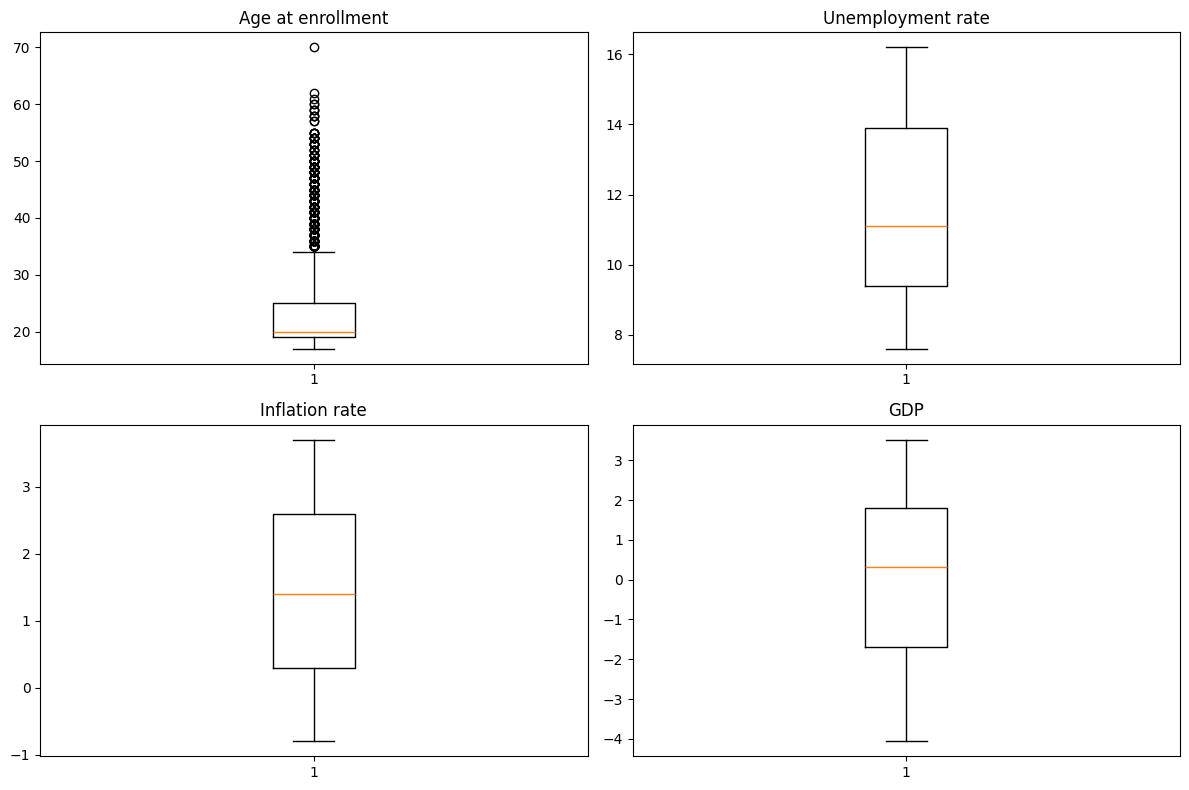

In [183]:
plot_numerical_variable_outliers()

In [184]:
# Função para identificar e tratar outliers usando IQR
def tratar_outliers_iqr(coluna):
    Q1 = np.percentile(coluna, 25)
    Q3 = np.percentile(coluna, 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Substituir valores fora do intervalo pelo limite mais próximo
    coluna_sem_outliers = np.where(coluna < limite_inferior, limite_inferior,
                                  np.where(coluna > limite_superior, limite_superior, coluna))

    return coluna_sem_outliers

# Aplicar a detecção e tratamento de outliers para cada coluna
df_preparado['Age at enrollment'] = tratar_outliers_iqr(df_preparado['Age at enrollment'])
df_preparado['Unemployment rate'] = tratar_outliers_iqr(df_preparado['Unemployment rate'])
df_preparado['Inflation rate'] = tratar_outliers_iqr(df_preparado['Inflation rate'])
df_preparado['GDP'] = tratar_outliers_iqr(df_preparado['GDP'])


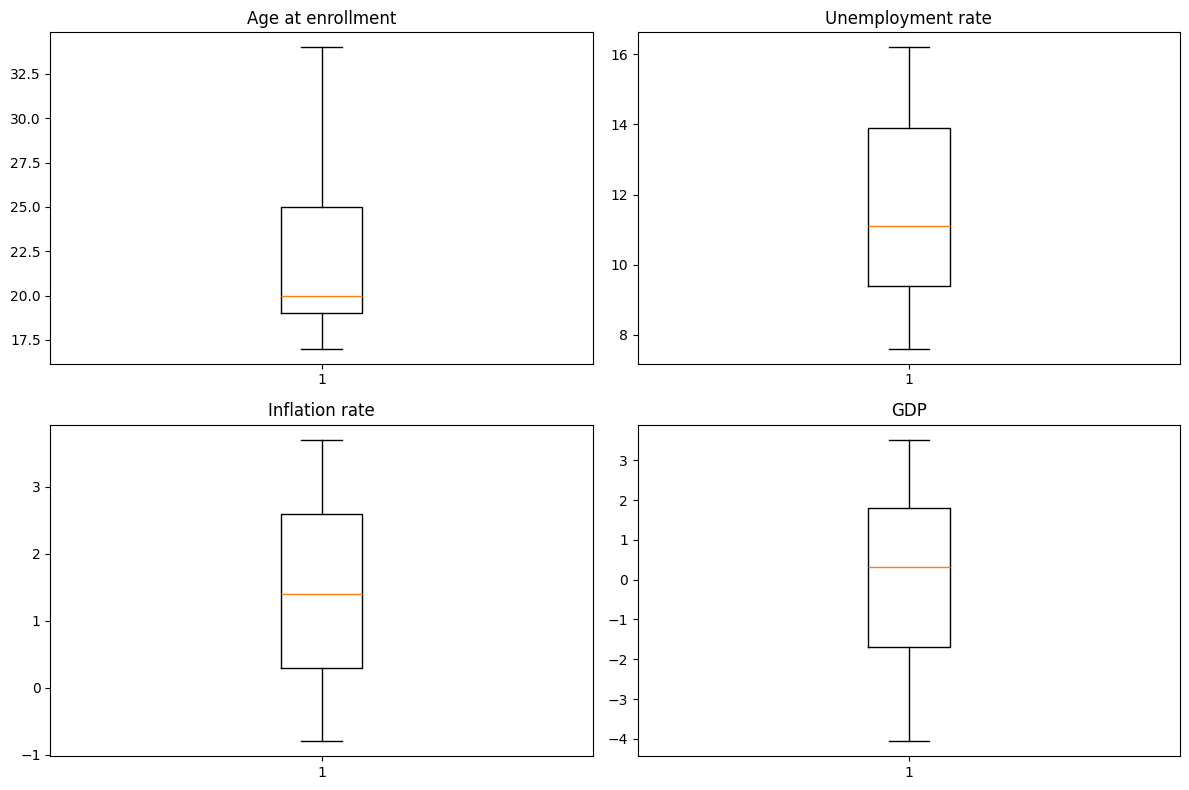

In [185]:
plot_numerical_variable_outliers()

In [186]:
# Lista de todas as colunas, exceto a coluna alvo
colunas_a_normalizar = df_preparado.columns.difference(['Target'])

# Inicializar os scalers
scaler_zscore = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Aplicar a normalização z-score em todas as colunas
df_preparado_zscore = df_preparado.copy()
df_preparado_zscore[colunas_a_normalizar] = scaler_zscore.fit_transform(df_preparado_zscore[colunas_a_normalizar])

# Aplicar Min-Max Scaling em todas as colunas
df_preparado_minmax = df_preparado.copy()
df_preparado_minmax[colunas_a_normalizar] = scaler_minmax.fit_transform(df_preparado_minmax[colunas_a_normalizar])

# Aplicar Robust Scaling em todas as colunas
df_preparado_robust = df_preparado.copy()
df_preparado_robust[colunas_a_normalizar] = scaler_robust.fit_transform(df_preparado_robust[colunas_a_normalizar])


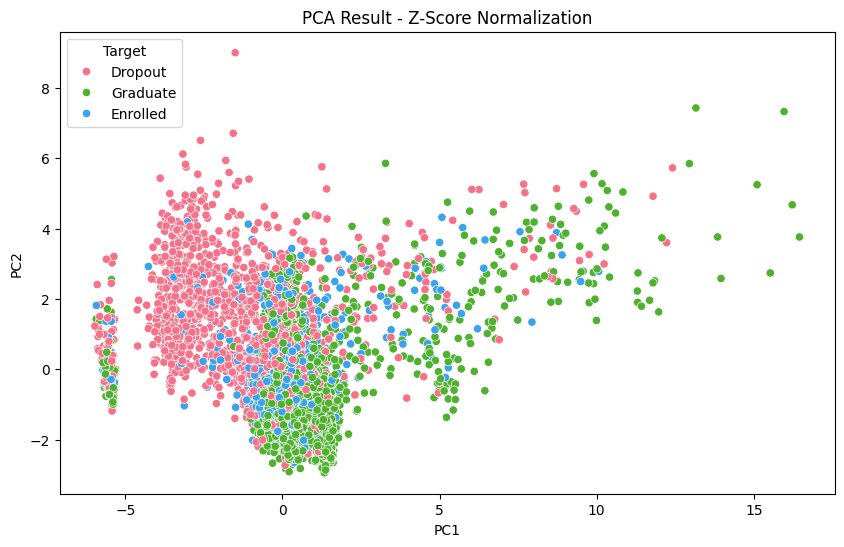

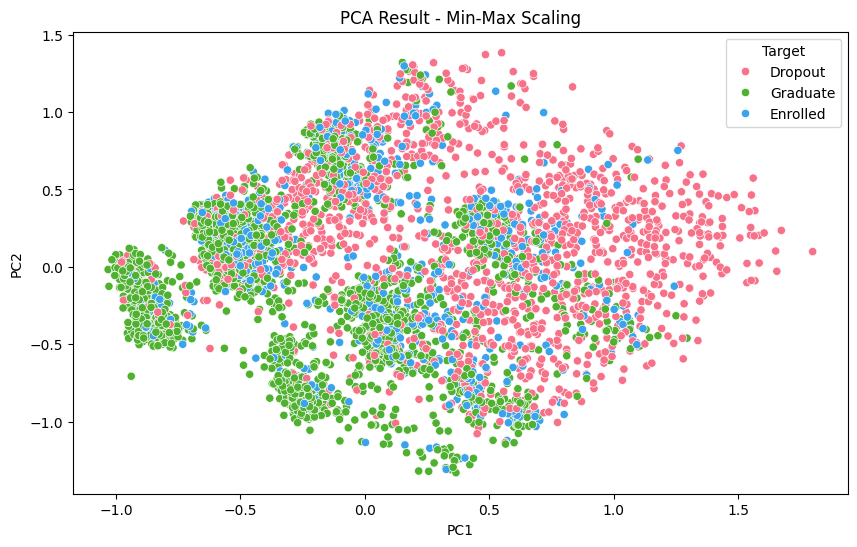

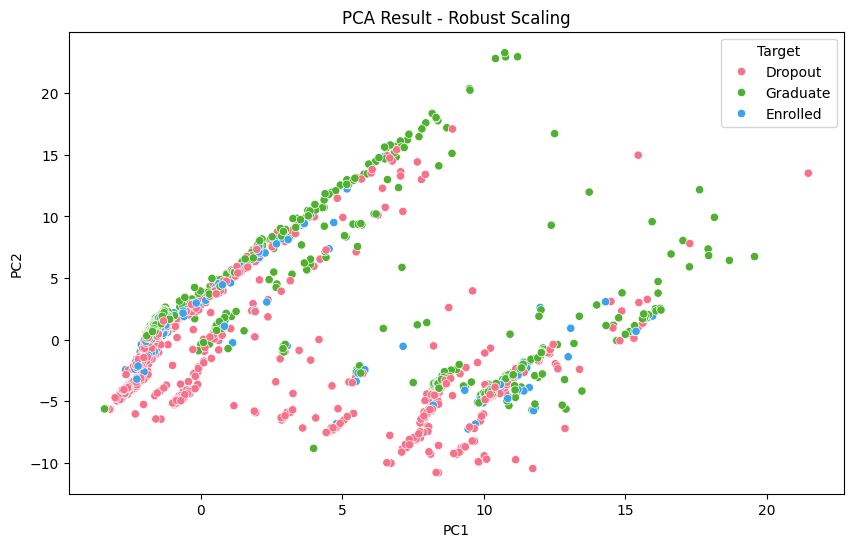

In [187]:
# Mapeamento para a legenda
target_legend_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

# Função para aplicar o PCA e plotar os resultados
def visualizar_pca(df, title):
    # Separar a coluna alvo
    target = df['Target']

    # Remover a coluna alvo antes de aplicar o PCA
    df_sem_target = df.drop('Target', axis=1)

    # Inicializar o PCA com 2 componentes
    pca = PCA(n_components=2)

    # Aplicar o PCA nas colunas restantes
    pca_result = pca.fit_transform(df_sem_target)

    # Criar DataFrame com os resultados do PCA
    df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

    # Adicionar a coluna alvo ao DataFrame PCA para visualização
    df_pca['Target'] = target.map(target_legend_mapping)

    # Plotar o gráfico 2D
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca, palette='husl')
    plt.title(title)
    plt.show()

# Aplicar PCA e visualizar resultados para cada técnica de normalização
visualizar_pca(df_preparado_zscore, 'PCA Result - Z-Score Normalization')
visualizar_pca(df_preparado_minmax, 'PCA Result - Min-Max Scaling')
visualizar_pca(df_preparado_robust, 'PCA Result - Robust Scaling')


In [188]:
# Criar uma cópia do DataFrame original
df_final_scaled = df_preparado.copy()

# Separar a coluna 'Target'
target_column = df_final_scaled['Target']

# Excluir a coluna 'Target' temporariamente para normalização
df_final_scaled = df_final_scaled.drop('Target', axis=1)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar Z-Score Scaling nas colunas (excluindo temporariamente 'Target')
df_final_scaled[df_final_scaled.columns] = scaler.fit_transform(df_final_scaled[df_final_scaled.columns])

# Reinserir a coluna 'Target' no DataFrame normalizado
df_final_scaled['Target'] = target_column

print(df_final_scaled.head())


   Marital status    Course  Daytime/evening attendance  \
0       -0.294829 -1.823744                    0.350082   
1       -0.294829  0.254153                    0.350082   
2       -0.294829 -1.131112                    0.350082   
3       -0.294829  1.177663                    0.350082   
4        1.356212 -1.592866                   -2.856470   

   Previous qualification  Mother's qualification  Father's qualification  \
0               -0.386404                0.075111               -0.584526   
1               -0.386404               -1.254495               -1.218380   
2               -0.386404                1.072315                0.954834   
3               -0.386404                1.183116                0.954834   
4               -0.386404                1.072315                1.045384   

   Mother's occupation  Father's occupation  Displaced  \
0            -0.329669             0.449087   0.907512   
1            -0.829997            -0.786461   0.907512   
2       

In [189]:
# Separar os dados em features (X) e variável alvo (y)
X = df_final_scaled.drop('Target', axis=1)
y = df_final_scaled['Target']

# Dividir os dados em conjuntos de treinamento e teste, 70% treinamento e 30% de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))


Tamanho do conjunto de treinamento: 3096
Tamanho do conjunto de teste: 1328


### Remoção de colunas menos relevantes

Durante a análise das características do conjunto de dados, identificamos colunas que poderiam ter uma menor relevância para o modelo de rede neural regressiva. Optamos por remover as seguintes colunas:

- 'Application mode'
- 'Application order'
- 'Nacionality'

Essa escolha foi baseada na análise de relevância de cada variável para o objetivo específico de prever o desempenho acadêmico dos alunos utilizando uma rede neural regressiva.

### Exploração e Tratamento de Outliers

Durante a análise exploratória, identificamos outliers notáveis em algumas variáveis-chave, incluindo "Age at enrollment", "Unemployment rate", "Inflation rate", e "GDP". Optamos por tratar esses outliers utilizando a técnica do Intervalo Interquartil (IQR).

A técnica do IQR envolve o cálculo dos quartis do conjunto de dados e a identificação de valores que estão além de limites específicos. Para cada variável mencionada, calculamos os limites inferior e superior do IQR e substituímos os valores fora desses limites pelos limites mais próximos.

Essa abordagem preserva a integridade dos dados, removendo valores extremos que poderiam impactar negativamente o desempenho do modelo de rede neural regressiva.

### Normalização dos Dados

Para a normalização dos dados, utilizamos uma abordagem onde verificamos a eficácia de dois dos métodos mais comuns de Normalização, sendo eles o Min-Max Scaling, Standardization Scaling e o Robust Scaling. Após uma análise visual da distribuição de pontos considerando as principais componentes da base de dados, concluímos que o resultado observado usando o Standardization Scaling era mais satisfatório.

Escolhemos aplicar a técnica de Standardization para normalizar os dados. Essa escolha foi motivada pela necessidade de garantir que diferentes variáveis numéricas estivessem na mesma escala. A padronização é crucial para algoritmos sensíveis à escala, como a rede neural regressiva, garantindo que nenhuma variável tenha um peso desproporcional na modelagem.

### Divisão dos Dados em Treinamento e Teste

Dividimos o conjunto de dados normalizado em conjuntos de treinamento e teste. Optamos por uma divisão de 70% para treinamento e 30% para teste, uma prática comum que permite avaliar a performance do modelo em dados não vistos. Utilizamos a função `train_test_split` do scikit-learn para realizar essa divisão de maneira aleatória e estratificada.

Essas etapas de preparação estabeleceram uma base sólida para a construção e avaliação de uma rede neural regressiva, proporcionando um conjunto de dados mais refinado e pronto para a modelagem preditiva do desempenho acadêmico dos alunos.

## 4. Modeling (Modelagem)

In [191]:
# Convertendo os rótulos para codificação one-hot (necessário para a regressão logística multiclasse)
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

num_classes = 3

# Definindo a arquitetura da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),  # Adicionando dropout para evitar overfitting
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),  # Adicionando dropout para evitar overfitting
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),  # Adicionando dropout para evitar overfitting
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),  # Adicionando dropout para evitar overfitting
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Softmax para problemas multiclasse
])

# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train_onehot, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

# Avaliação do modelo no conjunto de teste
y_pred_onehot = model.predict(X_test)
y_pred_neural_network = np.argmax(y_pred_onehot, axis=1)  # Convertendo de volta para rótulos originais

# Avaliação da precisão
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Matriz de confusão
conf_matrix_neural_network = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix_neural_network)


Epoch 1/100
88/88 - 1s - loss: 1.0312 - accuracy: 0.4946 - val_loss: 1.0625 - val_accuracy: 0.4839 - 850ms/epoch - 10ms/step
Epoch 2/100
88/88 - 0s - loss: 1.0258 - accuracy: 0.5047 - val_loss: 1.0453 - val_accuracy: 0.4839 - 109ms/epoch - 1ms/step
Epoch 3/100
88/88 - 0s - loss: 1.0170 - accuracy: 0.5072 - val_loss: 1.0351 - val_accuracy: 0.4839 - 106ms/epoch - 1ms/step
Epoch 4/100
88/88 - 0s - loss: 0.9980 - accuracy: 0.5136 - val_loss: 0.9956 - val_accuracy: 0.4839 - 107ms/epoch - 1ms/step
Epoch 5/100
88/88 - 0s - loss: 0.8514 - accuracy: 0.6752 - val_loss: 0.7510 - val_accuracy: 0.7097 - 107ms/epoch - 1ms/step
Epoch 6/100
88/88 - 0s - loss: 0.7458 - accuracy: 0.7243 - val_loss: 0.7326 - val_accuracy: 0.7194 - 111ms/epoch - 1ms/step
Epoch 7/100
88/88 - 0s - loss: 0.7159 - accuracy: 0.7373 - val_loss: 0.7135 - val_accuracy: 0.7194 - 109ms/epoch - 1ms/step
Epoch 8/100
88/88 - 0s - loss: 0.7296 - accuracy: 0.7297 - val_loss: 0.7189 - val_accuracy: 0.7194 - 109ms/epoch - 1ms/step
Epoch 9

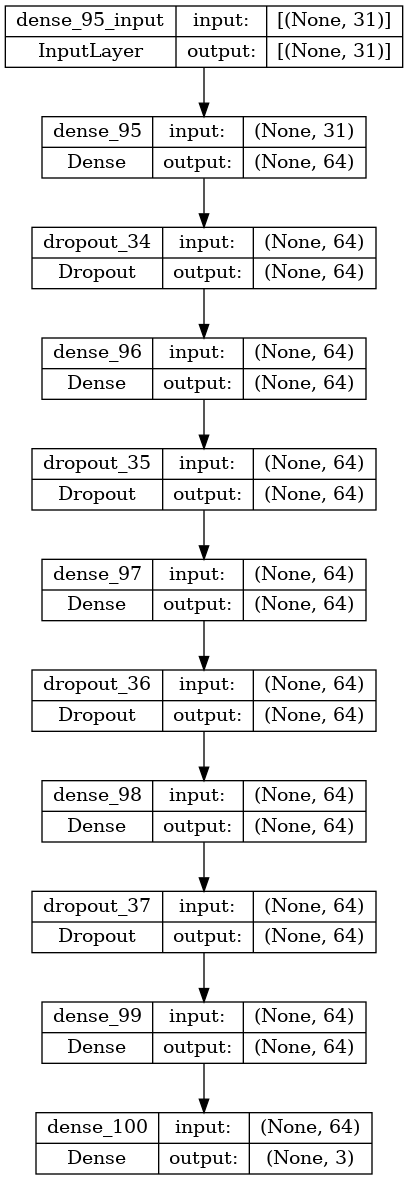

In [192]:
# Visualizando a arquitetura da rede neural
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [193]:
# Criação e treinamento do modelo de Regressão Logística
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Avaliação do modelo
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_logistic_regression}')

# Matriz de confusão
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
print('Matriz de Confusão do Modelo de Regressão Logística:')
print(conf_matrix_logistic_regression)

Acurácia do Modelo de Regressão Logística: 0.759789156626506
Matriz de Confusão do Modelo de Regressão Logística:
[[348  33  60]
 [ 64  75 106]
 [ 26  30 586]]


In [194]:
# Adapte o formato dos dados para séries temporais se necessário
# Se você estiver trabalhando com dados sequenciais, é possível que precise de um formato como (n_samples, time_steps, n_features)

# Criando e compilando o modelo LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Adapte o formato dos dados para se adequar às necessidades da camada LSTM
X_train_lstm = np.expand_dims(X_train, axis=-1)
X_test_lstm = np.expand_dims(X_test, axis=-1)

# Convertendo os rótulos para codificação one-hot
y_train_onehot_lstm = tf.keras.utils.to_categorical(y_train)
y_test_onehot_lstm = tf.keras.utils.to_categorical(y_test)

# Treinamento do modelo LSTM
model_lstm.fit(X_train_lstm, y_train_onehot_lstm, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

# Avaliação do modelo no conjunto de teste
y_pred_onehot_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_onehot_lstm, axis=1)

# Avaliação da precisão
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f'Acurácia do Modelo LSTM: {accuracy_lstm}')

# Matriz de confusão
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
print('Matriz de Confusão do Modelo LSTM:')
print(conf_matrix_lstm)

Epoch 1/100
88/88 - 2s - loss: 0.9958 - accuracy: 0.5564 - val_loss: 0.9690 - val_accuracy: 0.6161 - 2s/epoch - 18ms/step
Epoch 2/100
88/88 - 1s - loss: 0.9029 - accuracy: 0.6565 - val_loss: 0.8999 - val_accuracy: 0.6226 - 656ms/epoch - 7ms/step
Epoch 3/100
88/88 - 1s - loss: 0.8468 - accuracy: 0.6798 - val_loss: 0.8989 - val_accuracy: 0.6355 - 639ms/epoch - 7ms/step
Epoch 4/100
88/88 - 1s - loss: 0.8213 - accuracy: 0.6863 - val_loss: 0.8623 - val_accuracy: 0.6387 - 642ms/epoch - 7ms/step
Epoch 5/100
88/88 - 1s - loss: 0.7954 - accuracy: 0.6927 - val_loss: 0.8272 - val_accuracy: 0.6774 - 653ms/epoch - 7ms/step
Epoch 6/100
88/88 - 1s - loss: 0.7801 - accuracy: 0.6917 - val_loss: 0.8286 - val_accuracy: 0.6710 - 658ms/epoch - 7ms/step
Epoch 7/100
88/88 - 1s - loss: 0.7771 - accuracy: 0.6981 - val_loss: 0.8123 - val_accuracy: 0.6710 - 701ms/epoch - 8ms/step
Epoch 8/100
88/88 - 1s - loss: 0.7666 - accuracy: 0.6978 - val_loss: 0.8089 - val_accuracy: 0.6645 - 673ms/epoch - 8ms/step
Epoch 9/10

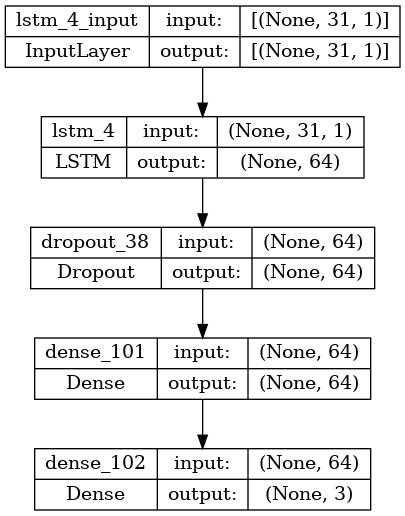

In [195]:
# Visualizando a arquitetura da rede neural
plot_model(model_lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## 5. Evaluation (Validação)


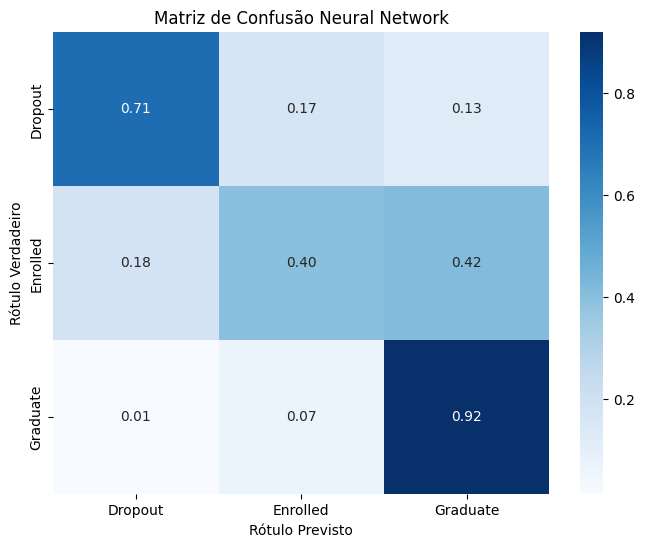

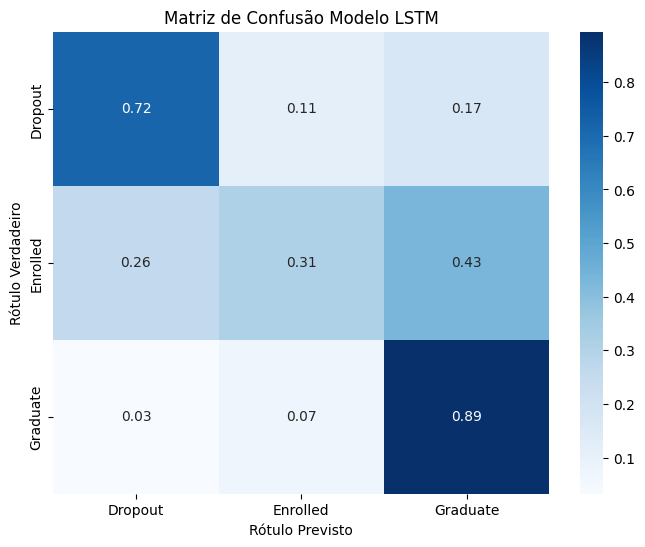

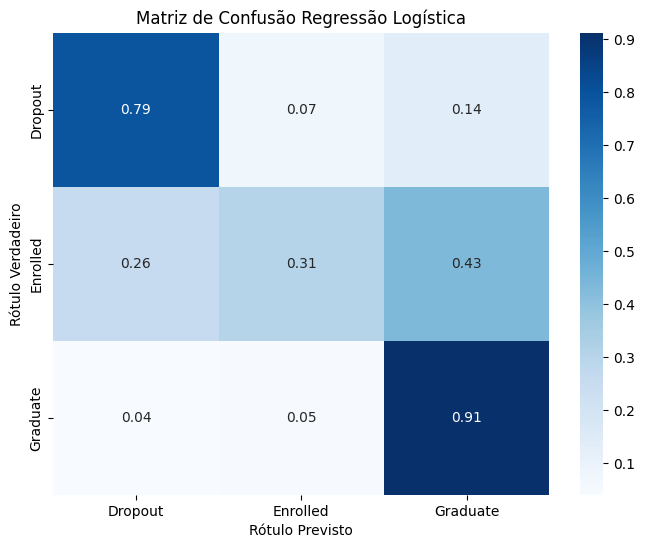

In [198]:
def plot_confusion_matrix(cm, title, classes, cmap=plt.cm.Blues):
    title = 'Matriz de Confusão ' + title

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Configurações do heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')

    plt.show()

# Uso do código
class_names = ["Dropout", "Enrolled", "Graduate"]
plot_confusion_matrix(conf_matrix_neural_network, 'Neural Network', classes=class_names)
plot_confusion_matrix(conf_matrix_lstm, 'Modelo LSTM', classes=class_names)
plot_confusion_matrix(conf_matrix_logistic_regression, 'Regressão Logística', classes=class_names)



In [204]:
metric_arr = []

for y_pred, name in [(y_pred_neural_network, "Rede Neural"), (y_pred_lstm, "Modelo LSTM"), (y_pred_logistic_regression, "Regressão Logística")]:
  # Calcular Precisão, Recall e F1-Score para cada classe
  precision = precision_score(y_test, y_pred, average=None)
  recall = recall_score(y_test, y_pred, average=None)
  f1 = f1_score(y_test, y_pred, average=None)

  metric_arr.append(([precision, recall, f1], name))

  print(f"Resultados para {name}:")
  # Exibir resultados
  for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-Score: {f1[i]:.4f}")
    print()

  # Relatório de classificação
  print("Relatório de Classificação:")
  print(classification_report(y_test, y_pred, target_names=class_names))
  print("------------------------------------------------------------------------------------------")


Resultados para Rede Neural:
Class: Dropout
  Precision: 0.8468
  Recall: 0.7392
  F1-Score: 0.7893

Class: Enrolled
  Precision: 0.4215
  Recall: 0.3837
  F1-Score: 0.4017

Class: Graduate
  Precision: 0.7903
  Recall: 0.8863
  F1-Score: 0.8355

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.85      0.74      0.79       441
    Enrolled       0.42      0.38      0.40       245
    Graduate       0.79      0.89      0.84       642

    accuracy                           0.74      1328
   macro avg       0.69      0.67      0.68      1328
weighted avg       0.74      0.74      0.74      1328

------------------------------------------------------------------------------------------
Resultados para Modelo LSTM:
Class: Dropout
  Precision: 0.7905
  Recall: 0.7188
  F1-Score: 0.7530

Class: Enrolled
  Precision: 0.4419
  Recall: 0.3102
  F1-Score: 0.3645

Class: Graduate
  Precision: 0.7603
  Recall: 0.8941
  F1-Score: 0.8218

Relató

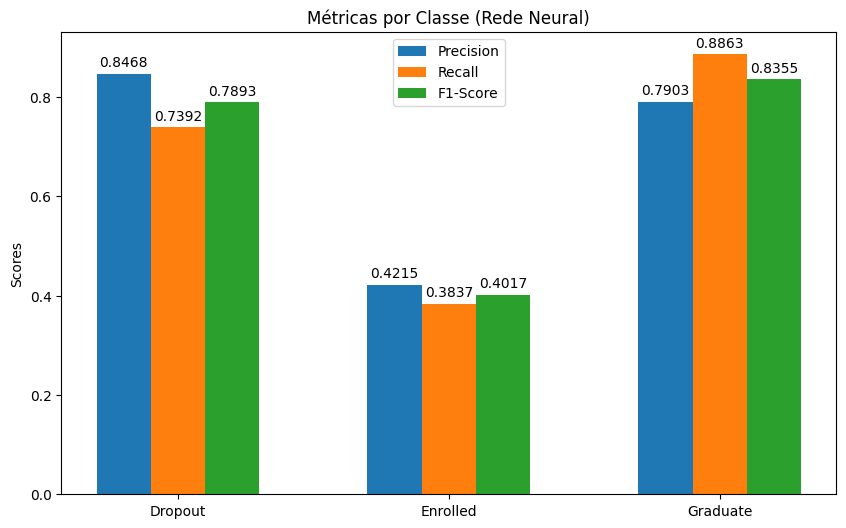

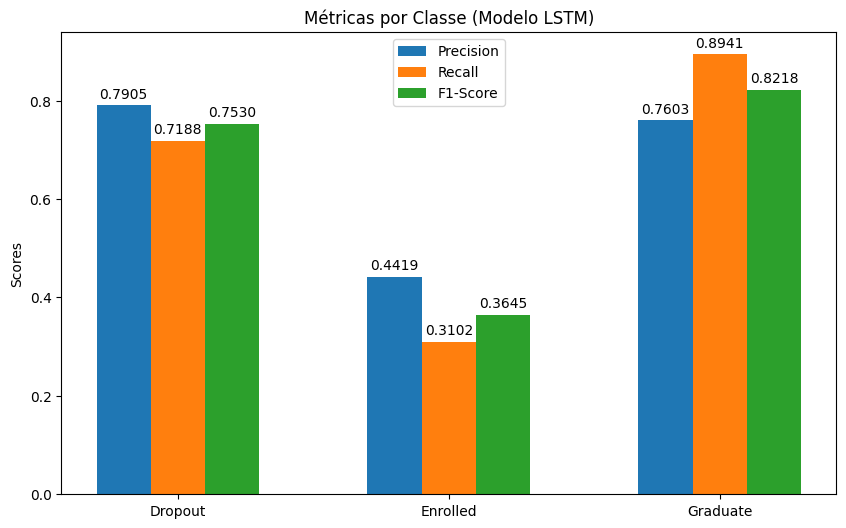

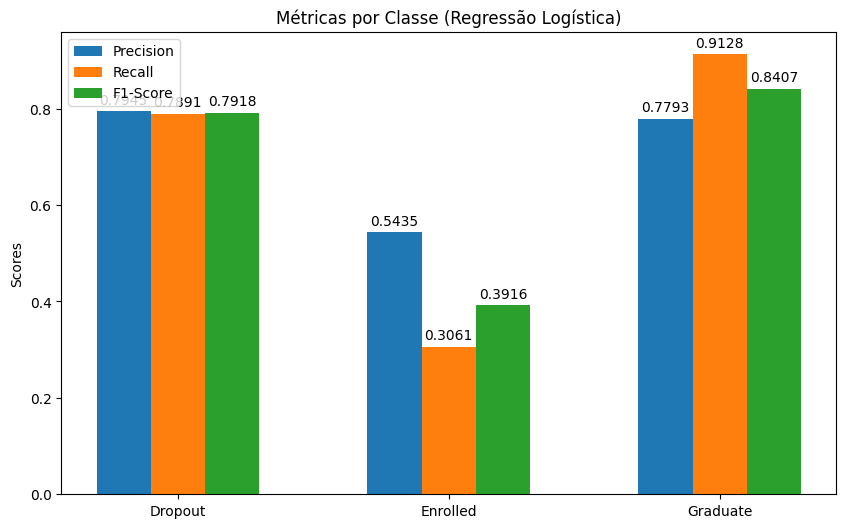

In [205]:
# Nomes das classes
class_names = ["Dropout", "Enrolled", "Graduate"]

# Índice para as barras
ind = np.arange(len(class_names))

# Largura das barras
width = 0.2

for metrics, name in metric_arr:
  # Plotagem das métricas
  fig, ax = plt.subplots(figsize=(10, 6))
  bar1 = ax.bar(ind - width, metrics[0], width, label='Precision')
  bar2 = ax.bar(ind, metrics[1], width, label='Recall')
  bar3 = ax.bar(ind + width, metrics[2], width, label='F1-Score')

  # Configurações do gráfico
  ax.set_xticks(ind)
  ax.set_xticklabels(class_names)
  ax.set_ylabel('Scores')
  ax.set_title('Métricas por Classe (' + name + ')')
  ax.legend()

  # Adiciona rótulos nas barras
  def add_labels(bars):
    for bar in bars:
      height = bar.get_height()
      ax.annotate('%.4f' % height,
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

  add_labels(bar1)
  add_labels(bar2)
  add_labels(bar3)

  plt.show()

In [206]:
for y_pred, name in [(y_pred_neural_network, "Rede Neural"), (y_pred_lstm, "Modelo LSTM"), (y_pred_logistic_regression, "Regressão Logística")]:
  print(f"Resultados para {name}:")
  # Calcular resíduos
  residuals = y_test - y_pred

  # Calcular a variância dos resíduos
  residual_variance = np.var(residuals)
  print(f"Variância dos Resíduos: {residual_variance:.4f}")

  # Calcular o erro médio quadrático (MSE)
  mse = mean_squared_error(y_test, y_pred)
  print(f"Erro Médio Quadrático (MSE): {mse:.4f}")

  # Calcular R²
  r2 = r2_score(y_test, y_pred)
  print(f"Coeficiente de Determinação (R²): {r2:.4f}")

  print("------------------------------------------------------------------------------------------")

Resultados para Rede Neural:
Variância dos Resíduos: 0.3784
Erro Médio Quadrático (MSE): 0.3886
Coeficiente de Determinação (R²): 0.5098
------------------------------------------------------------------------------------------
Resultados para Modelo LSTM:
Variância dos Resíduos: 0.4754
Erro Médio Quadrático (MSE): 0.4887
Coeficiente de Determinação (R²): 0.3834
------------------------------------------------------------------------------------------
Resultados para Regressão Logística:
Variância dos Resíduos: 0.4272
Erro Médio Quadrático (MSE): 0.4345
Coeficiente de Determinação (R²): 0.4518
------------------------------------------------------------------------------------------
